https://github.com/zalandoresearch/fashion-mnist

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.losses import CategoricalCrossentropy , SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

In [88]:
print(f"Training sample: \n{train_data[0]}")
print(f"Training labels: \n{train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [89]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

len(class_names)

10

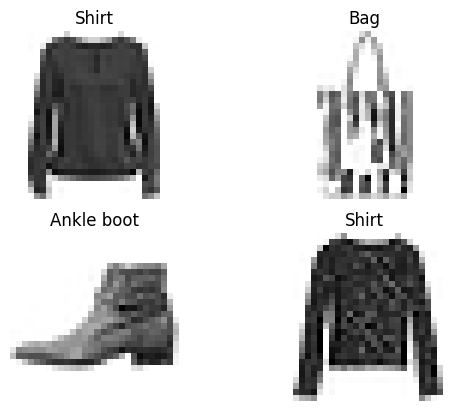

In [90]:
import random
plt.Figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [91]:
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

tf.random.set_seed(42)

model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        Dense(100,activation='relu'),
        Dropout(0.3),
        Dense(10,activation='relu'),
        Dropout(0.3),
        Dense(len(class_names),activation='linear')
    ]
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_norm = model.fit(train_data_normalized,train_labels,epochs=12,validation_data=(test_data_normalized,test_labels),verbose=0)
val_accuracies = history_norm.history['val_accuracy']
final_val_acc = val_accuracies[-1]
print(f"Final Validation Accuracy for normalized dataset: {final_val_acc:.4f}")

c:\Users\OMEN\OneDrive\Desktop\Machine Learning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final Validation Accuracy for normalized dataset: 0.8577


In [92]:
loss, accuracy = model.evaluate(test_data_normalized, test_labels)

print(f"Final Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8577 - loss: 0.4083
Final Test Loss: 0.4083
Final Test Accuracy: 85.77%


In [93]:
# Get the model's raw logit predictions
y_logits = model.predict(test_data_normalized)

# Convert logits to predicted class labels by taking the argmax
y_pred = np.argmax(y_logits, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.84      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.67      0.86      0.75      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.79      0.70      0.74      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.71      0.50      0.58      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



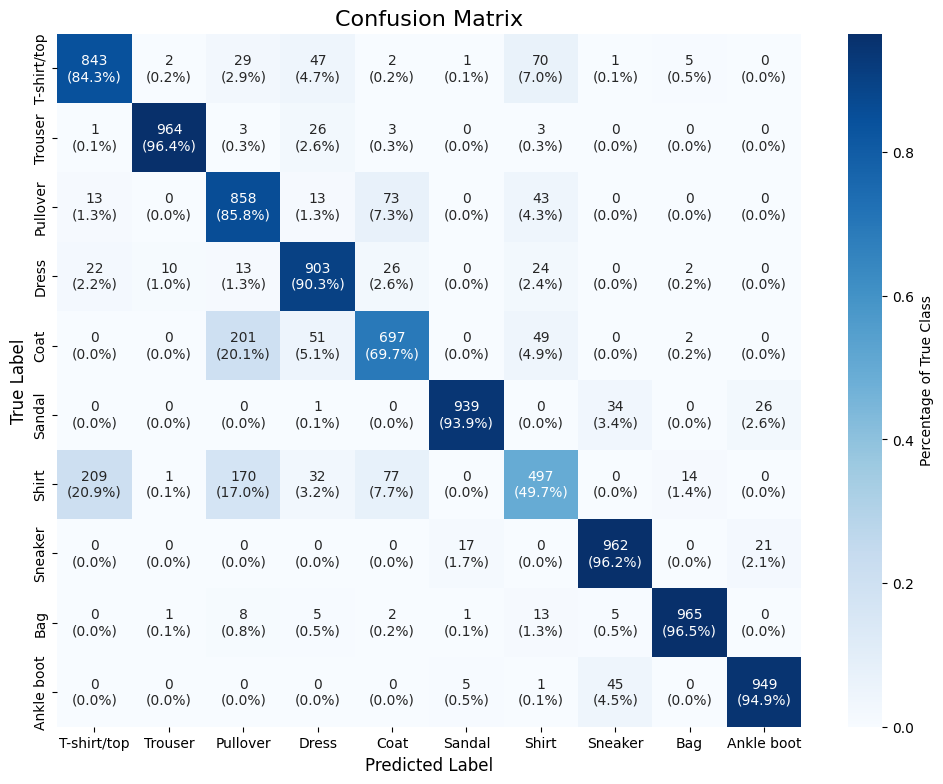

In [97]:
# Assume test_labels, y_pred, and class_names are already defined
# y_pred should be the predicted class indices, e.g., from np.argmax()

# 1. Compute the confusion matrix (raw counts)
cm = confusion_matrix(test_labels, y_pred)

# 2. Calculate the percentage matrix
#    We divide each cell by the sum of its row (i.e., the total number of true samples for that class)
row_sums = cm.sum(axis=1, keepdims=True)
cm_percent = cm / row_sums

# 3. Create the annotation labels that combine count and percentage
#    The format is: "Count\n(Percentage%)"
labels = (np.asarray(["{0}\n({1:.1%})".format(count, P)
                     for count, P in zip(cm.flatten(),
                                         cm_percent.flatten())])
          ).reshape(cm.shape)


# 4. Plot the confusion matrix using the percentage matrix for color
#    and the custom labels for annotation.
plt.figure(figsize=(12, 9))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage of True Class'}) # Add label to color bar

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

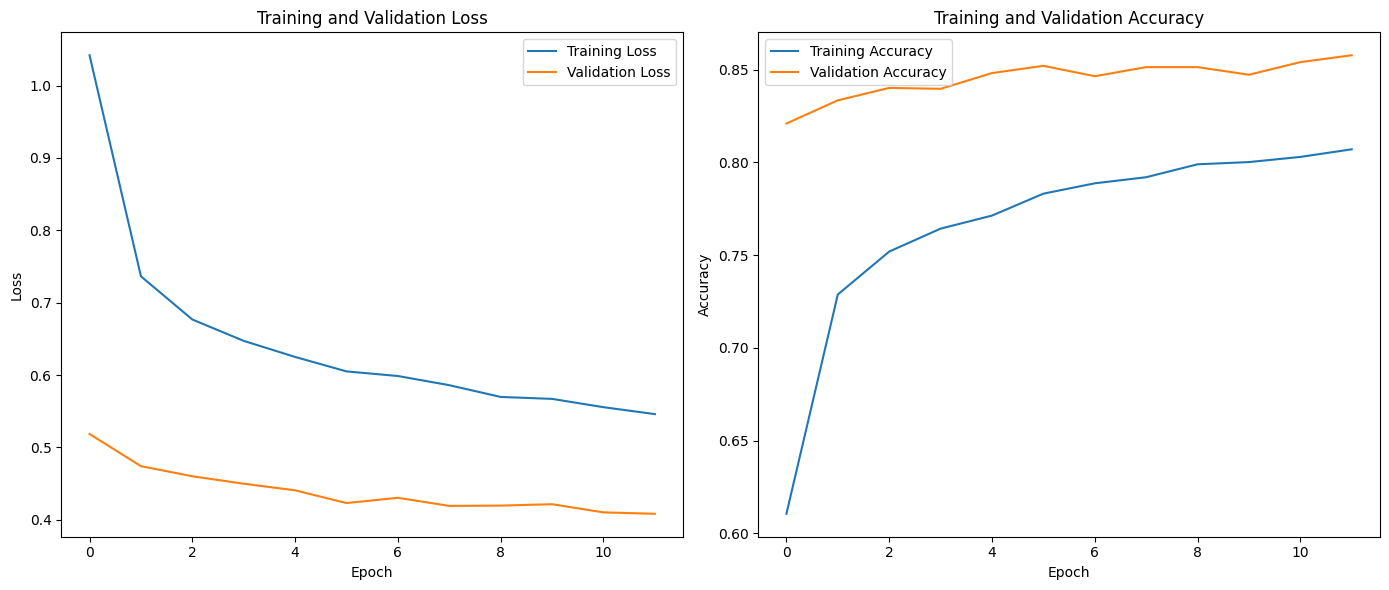

In [95]:
# Convert the history object into a pandas DataFrame
history_df = pd.DataFrame(history_norm.history)

# Create the plots
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

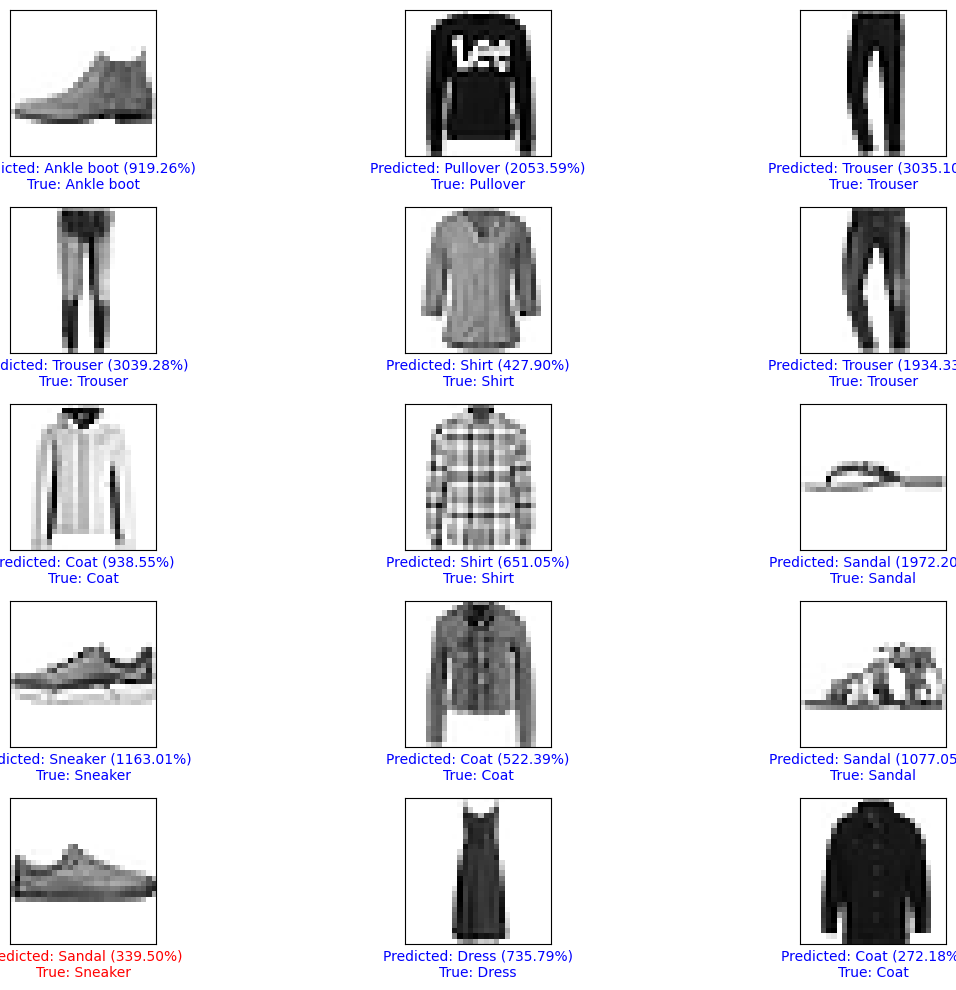

In [96]:
def plot_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'   # Incorrect prediction

    plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%)\nTrue: {class_names[true_label]}",
               color=color)

# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_prediction(i, y_logits[i], test_labels, test_data_normalized)
plt.tight_layout()
plt.show()